In [1]:
import sys
sys.path.append('/home/robert/research/impropers_analysis')
from impropers_lib import *

import os
import subprocess
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import re
from pymatgen.io.lammps.outputs import parse_lammps_log
import numpy as np

# from vislib import *

title = {'fontsize':20}
axes = {'fontsize':16}

In [2]:
%pwd

'/home/robert/research/impropers_analysis/ptb7out'

In [3]:
# Specify directory to search for files
directory_path = "./rotation-run/"

# Regular expression for extracting phi and theta from filename
filename_pattern = re.compile(r"_Phi_(\d+)_Theta_(\d+)_")

# Regular expression for extracting energy from file content
energy_pattern = re.compile(r"\s+Total energy in the final basis set =\s+(-?\d+\.\d+)")
rimp2_pattern = re.compile(r"RIMP2\s+total energy =\s+(-?\d+\.\d+) a\.u\.")

energy_total = extract_qchem_energies(directory_path, filename_pattern, energy_pattern)
rimp2_total = extract_qchem_energies(directory_path, filename_pattern, rimp2_pattern)
etot_complete = check_QM_completion(energy_total)
rimp2_complete = check_QM_completion(rimp2_total)

[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36
[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36


In [4]:
# Specify directory to search for files
directory_path = "./hydrogenated-rotation-run/"

# Regular expression for extracting phi and theta from filename
filename_pattern = re.compile(r"_Phi_(\d+)_Theta_(\d+)_")

# Regular expression for extracting energy from file content
energy_pattern = re.compile(r"\s+Total energy in the final basis set =\s+(-?\d+\.\d+)")
rimp2_pattern = re.compile(r"RIMP2\s+total energy =\s+(-?\d+\.\d+) a\.u\.")

energy_hyd = extract_qchem_energies(directory_path, filename_pattern, energy_pattern)
rimp2_hyd = extract_qchem_energies(directory_path, filename_pattern, rimp2_pattern)
etot_complete = check_QM_completion(energy_hyd)
rimp2_complete = check_QM_completion(rimp2_hyd)

[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36
[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36


In [5]:
# Specify directory to search for files
directory_path = "./methylated-rotation-run/"

# Regular expression for extracting phi and theta from filename
filename_pattern = re.compile(r"_Phi_(\d+)_Theta_(\d+)_")

# Regular expression for extracting energy from file content
energy_pattern = re.compile(r"\s+Total energy in the final basis set =\s+(-?\d+\.\d+)")
rimp2_pattern = re.compile(r"RIMP2\s+total energy =\s+(-?\d+\.\d+) a\.u\.")

energy_meth = extract_qchem_energies(directory_path, filename_pattern, energy_pattern)
rimp2_meth = extract_qchem_energies(directory_path, filename_pattern, rimp2_pattern)
etot_complete = check_QM_completion(energy_meth)
rimp2_complete = check_QM_completion(rimp2_meth)

[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36
[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36


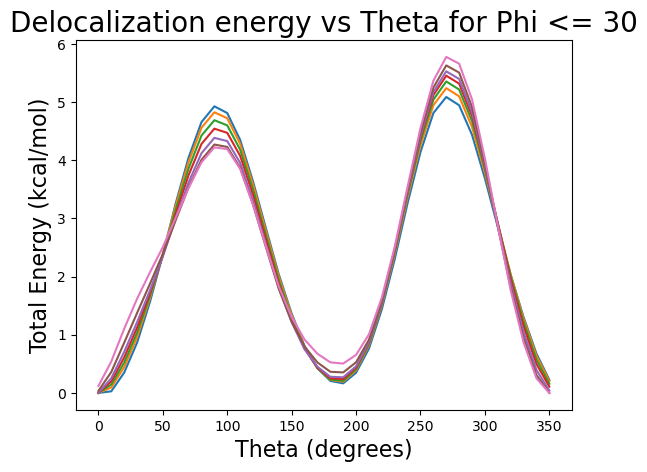

In [6]:
energy_df = calc_deloc_energies(energy_total, energy_hyd, energy_meth)
rimp2_df = calc_deloc_energies(rimp2_total, rimp2_hyd, rimp2_meth)

sorted_deloc = energy_df.sort_values(['Theta', 'Phi'])
for phi in set(sorted_deloc['Phi']):
    if phi <= 30:
        subset = sorted_deloc[sorted_deloc['Phi'] == phi]
        min = np.min(subset['E_deloc'])
        norm = [627.509*(i - min) for i in subset['E_deloc']]
        # plt.plot(subset['theta'], subset['PotEng'])  # Replace 'E_total' with the actual column name for total energy
        plt.plot(subset['Theta'], norm)  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_dihed'], c="red")  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_impro'], c="black")  # Replace 'E_total' with the actual column name for total energy
plt.xlabel('Theta (degrees)', fontdict=axes)
plt.ylabel('Total Energy (kcal/mol)', fontdict=axes)
plt.title(f'Delocalization energy vs Theta for Phi <= 30', fontdict=title)
plt.show()

In [7]:
sorted_deloc.to_csv("sorted_deloc_energies.ptb7fout.csv")